In [3]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
from IPython.display import Audio

warnings.filterwarnings("ignore")

# datos utilizados del siguiente link
# https://www.kaggle.com/competitions/tensorflow-speech-recognition-challenge/data?select=test.7z

In [4]:
os.getcwd()

'/Users/habi/Documents/personal/nlp_course/clase_2'

In [38]:
train_audio_path = '/Users/habi/Documents/personal/nlp_course/clase_2'# "/content/drive/My Drive/corpus_audio"
samples, sample_rate = librosa.load(train_audio_path+'/clip_0a0aa67a9.wav', sr = 16000)


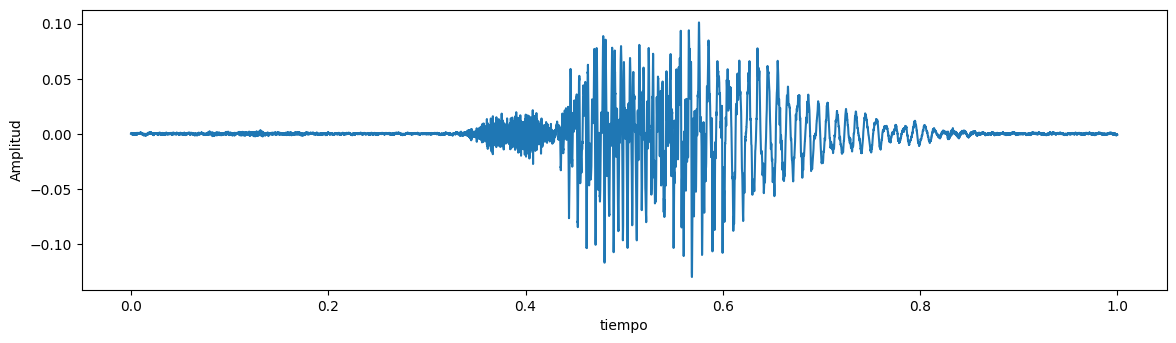

In [39]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('tiempo')
ax1.set_ylabel('Amplitud')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)


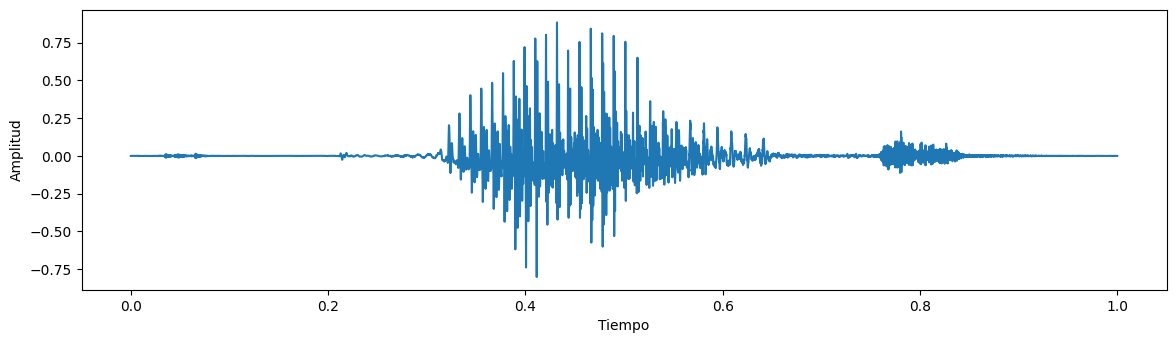

In [40]:
samples, sample_rate = librosa.load(train_audio_path+'/clip_0a0a60a16.wav', sr = 16000)
fig2 = plt.figure(figsize=(14, 8))
ax1 = fig2.add_subplot(211)
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Amplitud')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)


In [41]:
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128,
                                    fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

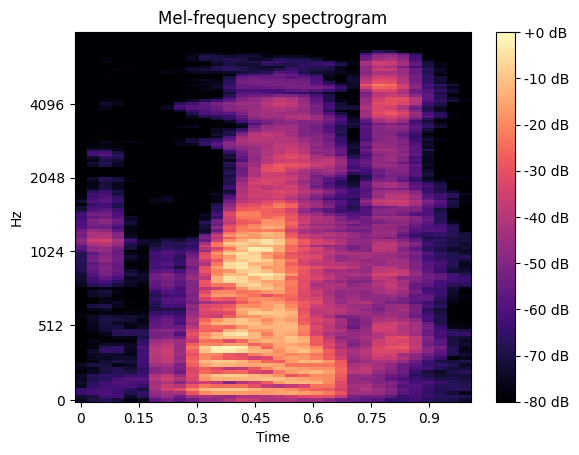

In [42]:
import matplotlib.pyplot as plt
import librosa.display
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [44]:
%%time
# leyendo bloques de audio

#train_audio_path = "/content/drive/My Drive/corpus_audio"
train_audio_path = '/Users/habi/Documents/personal/tensorflow-speech-recognition-challenge/train/audio'
labels=["no", "yes"]


all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)



no
yes
CPU times: user 1min 2s, sys: 619 ms, total: 1min 2s
Wall time: 1min 4s


In [45]:
all_wave[0].shape

(8000,)

In [46]:
all_mfcc=[]
for onda in all_wave:
  mfccs=librosa.feature.mfcc(y=onda, sr=8000, n_mfcc=40)
  mfccs_processed = np.mean(mfccs.T,axis=0)
  all_mfcc.append(mfccs_processed)


In [47]:
all_mfcc[0].shape

(40,)

In [48]:
len(all_mfcc)

4255

In [49]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [50]:
from sklearn.model_selection import train_test_split
audio_tr, audio_test, y_tr, y_test = train_test_split(all_mfcc, y, test_size=0.2, random_state=594, stratify=y)


In [51]:
from sklearn import svm
svmsent=svm.SVC(kernel="rbf",gamma="scale", probability=True, class_weight="balanced")
svmsent.fit(audio_tr,y_tr)

SVC(class_weight='balanced', probability=True)

In [52]:
predicciones=svmsent.predict(audio_test)
predicciones.shape

(851,)

In [53]:
from sklearn.metrics import precision_recall_curve, roc_curve, balanced_accuracy_score, f1_score, precision_score,recall_score, roc_auc_score
sklearn.metrics.precision_score(y_test,predicciones)

0.8567901234567902

In [54]:
sklearn.metrics.recall_score(y_test,predicciones)

0.8051044083526682

In [56]:
sklearn.metrics.f1_score(y_test,predicciones)

0.8301435406698564